In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,balanced_accuracy_score,precision_score

import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv("task_3_training_e8da4715deef7d56_f8b7378_generic.csv")
data_test = pd.read_csv("task_4_test.csv")

features_to_exclude = ['midlevel_features_tonal_stability','midlevel_features_dissonance','essentia_strong_peak_stdev','librosa_chroma_pct_10_3','librosa_chroma_pct_50_0','librosa_chroma_pct_50_1','librosa_chroma_pct_50_2','librosa_chroma_pct_50_3','librosa_chroma_pct_50_4','librosa_chroma_pct_50_5','librosa_chroma_pct_50_6','librosa_chroma_pct_50_7','librosa_chroma_pct_50_8','librosa_chroma_pct_50_9','librosa_chroma_pct_50_10','librosa_chroma_pct_50_11','mirtoolbox_hcdf_pct_50','mirtoolbox_novelty_pct_50','mirtoolbox_novelty_std','mirtoolbox_novelty_pct_90','mirtoolbox_roughness_pct_10','mirtoolbox_roughness_pct_50','mirtoolbox_roughness_pct_90','mirtoolbox_dynamics_mean','mirtoolbox_dynamics_pct_10','mirtoolbox_dynamics_pct_50','mirtoolbox_dynamics_pct_90','librosa_mfcc_std_1','librosa_mfcc_std_7','librosa_mfcc_std_8','librosa_mfcc_std_9','librosa_mfcc_std_10','librosa_mfcc_std_11','librosa_mfcc_pct_50_8','librosa_mfcc_pct_50_9','librosa_mfcc_pct_50_10','librosa_mfcc_pct_50_11','librosa_mfcc_pct_50_6','librosa_mfcc_pct_50_7','librosa_mfcc_pct_50_1','librosa_mfcc_pct_90_3','librosa_mfcc_pct_90_4','librosa_mfcc_pct_90_5','librosa_mfcc_pct_10_8','librosa_mfcc_pct_10_6','librosa_mfcc_pct_50_5','librosa_mfcc_pct_10_5','librosa_mfcc_pct_50_4','librosa_mfcc_pct_10_4','librosa_mfcc_pct_10_3','librosa_mfcc_pct_50_3','librosa_mfcc_pct_10_1','librosa_mfcc_pct_10_2','librosa_mfcc_pct_50_2','librosa_mfcc_pct_90_2','librosa_mfcc_pct_10_0','librosa_mfcc_pct_50_0','librosa_mfcc_pct_90_0','librosa_mfcc_mean_0','librosa_mfcc_mean_2']

data_test = data_test.loc[:, ~data_test.columns.isin(data_test.filter(features_to_exclude))]
data_test

,pianist_id,segment_id,snippet_id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,...,mirtoolbox_hcdf_pct_10,mirtoolbox_hcdf_pct_90,mirtoolbox_irregularity,mirtoolbox_keyclarity,mirtoolbox_mode,mirtoolbox_novelty_mean,mirtoolbox_novelty_pct_10,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std
0,1,27,0,0.229886,0.062064,4.818434,93184008.0,3.600000,0.614987,0.090779,...,0.069374,0.278847,1.029432,0.877971,-0.332906,0.104101,0.000000,0.046520,0.010760,0.005877
1,1,27,1,0.178258,0.062866,3.003938,109259888.0,4.000000,0.564438,0.094290,...,0.063834,0.384670,1.150170,0.763541,0.105649,0.089613,0.000000,0.175834,0.006592,0.002608
2,1,27,2,0.209623,0.063750,1.983438,98162960.0,4.600000,0.553583,0.111736,...,0.148812,0.518528,0.301306,0.659473,-0.148198,0.192730,0.000000,0.153210,0.007164,0.003635
3,1,27,3,0.215004,0.061839,1.470698,72971816.0,3.915029,0.642106,0.092053,...,0.181710,0.545455,0.220104,0.760754,0.172775,0.068173,0.007496,0.147771,0.012342,0.004185
4,1,28,0,0.187017,0.072593,2.613981,80688832.0,2.600000,0.564319,0.104814,...,0.111090,0.420087,1.065051,0.567374,-0.105469,0.067202,0.000000,0.283948,0.008589,0.003603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,11,60,5,0.239235,0.048011,1.178853,50233408.0,2.516549,0.640804,0.073967,...,0.079891,0.570405,0.583360,0.788715,-0.115055,0.174047,0.000000,0.157421,0.012897,0.003446
2081,11,61,0,0.293661,0.060317,2.598517,178390704.0,2.400000,0.676194,0.080788,...,0.114611,0.403662,0.339105,0.612967,0.038338,0.074019,0.000000,0.314337,0.015907,0.005273
2082,11,61,1,0.272440,0.058219,1.851364,178757696.0,4.600000,0.681900,0.081200,...,0.158639,0.442483,0.369082,0.502579,-0.087977,0.136694,0.000000,0.268032,0.016610,0.004190
2083,11,61,2,0.273417,0.060010,1.930694,285332608.0,2.000000,0.708230,0.066477,...,0.082022,0.262809,0.758210,0.803343,0.218998,0.109739,0.000000,0.241217,0.015410,0.004318


In [2]:
data_filtered = data[[c for c in data.columns if 'gemmes' not in c ]]
data_filtered = data_filtered[[c for c in data_filtered.columns if 'gems' not in c ]]
correlation = data.corr()
features_to_exclude = ['midlevel_features_tonal_stability','midlevel_features_dissonance','essentia_strong_peak_stdev','librosa_chroma_pct_10_3','librosa_chroma_pct_50_0','librosa_chroma_pct_50_1','librosa_chroma_pct_50_2','librosa_chroma_pct_50_3','librosa_chroma_pct_50_4','librosa_chroma_pct_50_5','librosa_chroma_pct_50_6','librosa_chroma_pct_50_7','librosa_chroma_pct_50_8','librosa_chroma_pct_50_9','librosa_chroma_pct_50_10','librosa_chroma_pct_50_11','mirtoolbox_hcdf_pct_50','mirtoolbox_novelty_pct_50','mirtoolbox_novelty_std','mirtoolbox_novelty_pct_90','mirtoolbox_roughness_pct_10','mirtoolbox_roughness_pct_50','mirtoolbox_roughness_pct_90','mirtoolbox_dynamics_mean','mirtoolbox_dynamics_pct_10','mirtoolbox_dynamics_pct_50','mirtoolbox_dynamics_pct_90','librosa_mfcc_std_1','librosa_mfcc_std_7','librosa_mfcc_std_8','librosa_mfcc_std_9','librosa_mfcc_std_10','librosa_mfcc_std_11','librosa_mfcc_pct_50_8','librosa_mfcc_pct_50_9','librosa_mfcc_pct_50_10','librosa_mfcc_pct_50_11','librosa_mfcc_pct_50_6','librosa_mfcc_pct_50_7','librosa_mfcc_pct_50_1','librosa_mfcc_pct_90_3','librosa_mfcc_pct_90_4','librosa_mfcc_pct_90_5','librosa_mfcc_pct_10_8','librosa_mfcc_pct_10_6','librosa_mfcc_pct_50_5','librosa_mfcc_pct_10_5','librosa_mfcc_pct_50_4','librosa_mfcc_pct_10_4','librosa_mfcc_pct_10_3','librosa_mfcc_pct_50_3','librosa_mfcc_pct_10_1','librosa_mfcc_pct_10_2','librosa_mfcc_pct_50_2','librosa_mfcc_pct_90_2','librosa_mfcc_pct_10_0','librosa_mfcc_pct_50_0','librosa_mfcc_pct_90_0','librosa_mfcc_mean_0','librosa_mfcc_mean_2']

data_filtered = data_filtered.loc[:, ~data_filtered.columns.isin(data_filtered.filter(features_to_exclude))]
data_targets = data_filtered.loc[:, data_filtered.columns.isin(data_filtered.filter(['arousal', 'valence', 'quadrant']))]
X = data_filtered.loc[:, ~data_filtered.columns.isin(data_filtered.filter(['arousal', 'valence', 'quadrant']))]
feature_names = list(X.columns)
y = data_targets['quadrant'].to_numpy()
y = y.ravel()
y
target = (list(data_targets['quadrant'].unique()))
for i in range(len(target)):
    target[i]=str(target[i])
print(target)
X = X.to_numpy()

['3.0', '1.0', '2.0', '4.0']


>1, train: 0.397, test: 0.362
>2, train: 0.463, test: 0.408
>3, train: 0.484, test: 0.461
>4, train: 0.498, test: 0.434
>5, train: 0.567, test: 0.467
>6, train: 0.614, test: 0.539
>7, train: 0.663, test: 0.526
>8, train: 0.713, test: 0.579
>9, train: 0.759, test: 0.592
>10, train: 0.783, test: 0.572
>11, train: 0.809, test: 0.599
>12, train: 0.822, test: 0.592
>13, train: 0.836, test: 0.599
>14, train: 0.837, test: 0.612
>15, train: 0.837, test: 0.572
>16, train: 0.837, test: 0.572
>17, train: 0.837, test: 0.572
>18, train: 0.837, test: 0.572
>19, train: 0.837, test: 0.572
>20, train: 0.837, test: 0.572


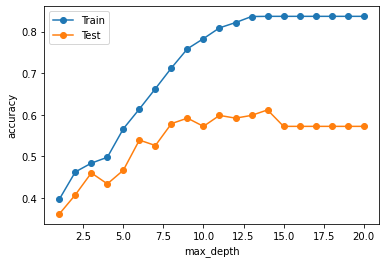

In [4]:
from matplotlib import pyplot
kf = StratifiedKFold(n_splits = 15, shuffle = True, random_state = 2)
for train_index, test_index in kf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
values = [i for i in range(1, 21)]
train_scores, test_scores = list(), list()
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i,criterion="entropy", random_state=42, min_samples_leaf=8)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth

pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
plt.ylabel('accuracy')
plt.xlabel('max_depth')
pyplot.legend()
pyplot.show()

In [6]:
model = DecisionTreeClassifier(max_depth=14,criterion="entropy", random_state=42, min_samples_leaf=8)
model.fit(X, y)
prediction = model.predict(data_test)

print(test_yhat)
import csv

i = 0

header = ['pianist_id','segment_id','snippet_id','quadrant']

with open('submission.csv', 'w', newline='') as f:
    for index, row in data_test.iterrows():
        data_row = [int(row['pianist_id']), int(row['segment_id']), int(row['snippet_id']), int(prediction[index])]
        writer = csv.writer(f)
        if index == 0:
            writer.writerow(header)
        writer.writerow(data_row)


[2. 3. 2. ... 2. 2. 2.]
